# Loading in data

In [1]:
data <- read.csv('D:/chungcu.csv')
attach(data)

# Descriptive statistics

In [2]:
summary(data)

       BR             WC           Furni           Area         DistToCenter   
 Min.   :1.00   Min.   :1.00   Min.   :0.00   Min.   : 43.00   Min.   : 2.200  
 1st Qu.:2.00   1st Qu.:2.00   1st Qu.:0.00   1st Qu.: 75.00   1st Qu.: 5.900  
 Median :2.00   Median :2.00   Median :1.00   Median : 90.00   Median : 7.900  
 Mean   :2.36   Mean   :1.86   Mean   :0.61   Mean   : 95.69   Mean   : 8.188  
 3rd Qu.:3.00   3rd Qu.:2.00   3rd Qu.:1.00   3rd Qu.:115.00   3rd Qu.:10.200  
 Max.   :4.00   Max.   :3.00   Max.   :1.00   Max.   :180.00   Max.   :15.500  
  TimeToCenter       Price          WCdummy     
 Min.   :10.00   Min.   : 6.00   Min.   :0.000  
 1st Qu.:22.00   1st Qu.:13.88   1st Qu.:1.000  
 Median :28.00   Median :16.00   Median :1.000  
 Mean   :28.97   Mean   :18.14   Mean   :0.785  
 3rd Qu.:34.00   3rd Qu.:20.00   3rd Qu.:1.000  
 Max.   :44.00   Max.   :55.00   Max.   :1.000  

In [3]:
cor(data[1:7])

,BR,WC,Furni,Area,DistToCenter,TimeToCenter,Price
BR,1.00000000,0.726709549,-0.01248737,0.83750840,0.023455422,0.049154809,0.5153628
WC,0.72670955,1.000000000,0.08043214,0.71841356,-0.003766987,0.004777875,0.4695828
Furni,-0.01248737,0.080432136,1.00000000,0.08976559,-0.088266035,-0.062864202,0.2987830
Area,0.83750840,0.718413559,0.08976559,1.00000000,-0.115838971,-0.085497350,0.6165050
DistToCenter,0.02345542,-0.003766987,-0.08826604,-0.11583897,1.000000000,0.864965410,-0.3163879
TimeToCenter,0.04915481,0.004777875,-0.06286420,-0.08549735,0.864965410,1.000000000,-0.2255649
Price,0.51536283,0.469582818,0.29878297,0.61650499,-0.316387914,-0.225564860,1.0000000


# Loading in necessary libraries

In [4]:
library('lmtest')
library('Metrics')


Warning message:
"package 'lmtest' was built under R version 4.2.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'Metrics' was built under R version 4.2.3"


# Initial models

### Model 1

In [5]:
test1 <- lm(Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WC)
summary(test1)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + 
    WC)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6136  -3.5560  -0.3655   2.1497  24.4877 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.36905    2.05732   2.610 0.009772 ** 
BR            1.36373    1.01285   1.346 0.179742    
Furni         3.62749    0.79811   4.545 9.67e-06 ***
Area          0.10533    0.02591   4.066 6.97e-05 ***
DistToCenter -0.94673    0.26053  -3.634 0.000358 ***
TimeToCenter  0.12306    0.09091   1.354 0.177428    
WC            0.77989    1.12002   0.696 0.487068    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.383 on 193 degrees of freedom
Multiple R-squared:  0.5055,	Adjusted R-squared:  0.4901 
F-statistic: 32.88 on 6 and 193 DF,  p-value: < 2.2e-16


### Model 2

In [6]:
test2 <- lm(log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + TimeToCenter + WC)
summary(test2)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + TimeToCenter + WC)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62317 -0.15784  0.01808  0.13465  0.61812 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.173686   0.094620  22.973  < 2e-16 ***
BR            0.103103   0.046583   2.213 0.028047 *  
Furni         0.203913   0.036706   5.555 9.11e-08 ***
Area          0.004962   0.001192   4.165 4.69e-05 ***
DistToCenter -0.044483   0.011982  -3.712 0.000269 ***
TimeToCenter  0.005813   0.004181   1.390 0.166036    
WC            0.004190   0.051512   0.081 0.935258    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2476 on 193 degrees of freedom
Multiple R-squared:  0.5506,	Adjusted R-squared:  0.5366 
F-statistic: 39.41 on 6 and 193 DF,  p-value: < 2.2e-16


In [7]:
resettest(lm(log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter))


	RESET test

data:  lm(log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter)
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894


### Model 3

In [8]:
test3 <- lm(Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WCdummy)
summary(test3)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + 
    WCdummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.471  -3.403  -0.442   2.360  24.020 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.09608    1.99845   2.550 0.011548 *  
BR            2.03600    0.98095   2.076 0.039262 *  
Furni         3.74765    0.79019   4.743 4.09e-06 ***
Area          0.12216    0.02551   4.789 3.32e-06 ***
DistToCenter -0.90037    0.25897  -3.477 0.000627 ***
TimeToCenter  0.12004    0.09018   1.331 0.184722    
WCdummy      -2.34205    1.26128  -1.857 0.064852 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.343 on 193 degrees of freedom
Multiple R-squared:  0.513,	Adjusted R-squared:  0.4978 
F-statistic: 33.88 on 6 and 193 DF,  p-value: < 2.2e-16


### Model 4

In [9]:
test4 <- lm(log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + TimeToCenter + WCdummy)
summary(test4)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + TimeToCenter + WCdummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5926 -0.1544  0.0171  0.1387  0.6486 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.150774   0.092058  23.363  < 2e-16 ***
BR            0.121213   0.045187   2.682 0.007942 ** 
Furni         0.206941   0.036400   5.685 4.77e-08 ***
Area          0.005438   0.001175   4.629 6.74e-06 ***
DistToCenter -0.043031   0.011929  -3.607 0.000394 ***
TimeToCenter  0.005763   0.004154   1.387 0.166954    
WCdummy      -0.088982   0.058100  -1.532 0.127276    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2461 on 193 degrees of freedom
Multiple R-squared:  0.556,	Adjusted R-squared:  0.5422 
F-statistic: 40.28 on 6 and 193 DF,  p-value: < 2.2e-16


# Backward-method insignificant variables removal

###      Model 1

#### Reduced model 1: lm(formula = Price ~ BR + Furni + Area + DistToCenter)


In [10]:
step(test1, direction = 'backward')

Start:  AIC=680.2
Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WC

               Df Sum of Sq    RSS    AIC
- WC            1     14.05 5607.3 678.70
- BR            1     52.54 5645.8 680.07
- TimeToCenter  1     53.10 5646.3 680.09
<none>                      5593.2 680.20
- DistToCenter  1    382.69 5975.9 691.44
- Area          1    479.05 6072.3 694.63
- Furni         1    598.68 6191.9 698.54

Step:  AIC=678.7
Price ~ BR + Furni + Area + DistToCenter + TimeToCenter

               Df Sum of Sq    RSS    AIC
- TimeToCenter  1     51.46 5658.7 678.53
<none>                      5607.3 678.70
- BR            1     79.89 5687.2 679.53
- DistToCenter  1    376.09 5983.4 689.68
- Area          1    569.68 6177.0 696.05
- Furni         1    618.79 6226.1 697.64

Step:  AIC=678.53
Price ~ BR + Furni + Area + DistToCenter

               Df Sum of Sq    RSS    AIC
<none>                      5658.7 678.53
- BR            1     88.90 5747.7 679.65
- Area          1    556.57 


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
      6.7398        1.6753        3.7108        0.1090       -0.6401  


### Model 2

#### Reduced model 2: lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter)

In [11]:
step(test2, direction = 'backward')

Start:  AIC=-551.52
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    TimeToCenter + WC

               Df Sum of Sq    RSS     AIC
- WC            1   0.00041 11.832 -553.51
- TimeToCenter  1   0.11849 11.950 -551.52
<none>                      11.831 -551.52
- BR            1   0.30030 12.131 -548.50
- DistToCenter  1   0.84486 12.676 -539.72
- Area          1   1.06335 12.895 -536.30
- Furni         1   1.89179 13.723 -523.85

Step:  AIC=-553.51
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    TimeToCenter

               Df Sum of Sq    RSS     AIC
- TimeToCenter  1   0.11817 11.950 -553.52
<none>                      11.832 -553.51
- BR            1   0.34329 12.175 -549.79
- DistToCenter  1   0.84524 12.677 -541.71
- Area          1   1.16481 12.996 -536.73
- Furni         1   1.91023 13.742 -525.58

Step:  AIC=-553.52
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter

               Df Sum of Sq    RSS     AIC
<none>               


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
    2.223017      0.108339      0.205901      0.004924     -0.030193  


### Model 3

#### Reduced model 3: lm(formula = Price ~ BR + WCdummy + Furni + Area + DistToCenter)

In [12]:
step(test3, direction = 'backward')

Start:  AIC=677.16
Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WCdummy

               Df Sum of Sq    RSS    AIC
- TimeToCenter  1     50.58 5559.4 676.99
<none>                      5508.9 677.16
- WCdummy       1     98.42 5607.3 678.70
- BR            1    122.96 5631.8 679.57
- DistToCenter  1    345.04 5853.9 687.31
- Furni         1    642.04 6150.9 697.21
- Area          1    654.76 6163.6 697.62

Step:  AIC=676.99
Price ~ BR + Furni + Area + DistToCenter + WCdummy

               Df Sum of Sq    RSS    AIC
<none>                      5559.4 676.99
- WCdummy       1     99.30 5658.7 678.53
- BR            1    134.01 5693.5 679.75
- DistToCenter  1    580.51 6140.0 694.85
- Area          1    641.79 6201.2 696.84
- Furni         1    655.28 6214.7 697.27



Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + WCdummy)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
      6.0709        2.1210        3.7839        0.1209       -0.6056  
     WCdummy  
     -2.3525  


### Model 4

#### Reduced model 4: lm(formula = log(Price, base = exp(1)) ~ BR + WCdummy + Furni + Area + DistToCenter)

In [13]:
step(test4, direction = 'backward')

Start:  AIC=-553.93
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    TimeToCenter + WCdummy

               Df Sum of Sq    RSS     AIC
- TimeToCenter  1   0.11657 11.806 -553.94
<none>                      11.690 -553.93
- WCdummy       1   0.14207 11.832 -553.51
- BR            1   0.43582 12.125 -548.60
- DistToCenter  1   0.78812 12.478 -542.88
- Area          1   1.29771 12.987 -534.87
- Furni         1   1.95764 13.647 -524.96

Step:  AIC=-553.94
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    WCdummy

               Df Sum of Sq    RSS     AIC
<none>                      11.806 -553.94
- WCdummy       1   0.14367 11.950 -553.52
- BR            1   0.46764 12.274 -548.17
- Area          1   1.26985 13.076 -535.51
- DistToCenter  1   1.32017 13.126 -534.74
- Furni         1   1.99304 13.799 -524.74



Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + WCdummy)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
    2.197575      0.125294      0.208679      0.005376     -0.028881  
     WCdummy  
   -0.089483  


# Summary of reduced models

### Model 1:

In [14]:
lm1 <- lm((Price) ~ Area + DistToCenter + BR + Furni)
summary(lm1)


Call:
lm(formula = (Price) ~ Area + DistToCenter + BR + Furni)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8606 -3.3170 -0.1949  2.0463 25.1390 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.73981    1.83966   3.664  0.00032 ***
Area          0.10897    0.02488   4.379 1.94e-05 ***
DistToCenter -0.64010    0.13412  -4.773 3.56e-06 ***
BR            1.67527    0.95713   1.750  0.08164 .  
Furni         3.71082    0.79530   4.666 5.70e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.387 on 195 degrees of freedom
Multiple R-squared:  0.4997,	Adjusted R-squared:  0.4895 
F-statistic: 48.69 on 4 and 195 DF,  p-value: < 2.2e-16


### Model 2:

In [15]:
lm2 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni)
summary(lm2)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6414 -0.1619  0.0137  0.1238  0.5842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.223017   0.084539  26.296  < 2e-16 ***
Area          0.004924   0.001143   4.306 2.63e-05 ***
DistToCenter -0.030193   0.006163  -4.899 2.02e-06 ***
BR            0.108339   0.043984   2.463   0.0146 *  
Furni         0.205901   0.036547   5.634 6.09e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2475 on 195 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.5368 
F-statistic: 58.65 on 4 and 195 DF,  p-value: < 2.2e-16


### Model 3:

In [16]:
lm3 <- lm(formula = Price ~ BR + Furni + Area + DistToCenter + WCdummy)
summary(lm3)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + WCdummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4156  -3.2465  -0.2945   2.1955  24.3974 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.07094    1.86312   3.258  0.00132 ** 
BR            2.12099    0.98082   2.162  0.03181 *  
Furni         3.78387    0.79129   4.782 3.43e-06 ***
Area          0.12085    0.02554   4.732 4.27e-06 ***
DistToCenter -0.60563    0.13456  -4.501 1.17e-05 ***
WCdummy      -2.35248    1.26376  -1.861  0.06419 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.353 on 194 degrees of freedom
Multiple R-squared:  0.5085,	Adjusted R-squared:  0.4958 
F-statistic: 40.14 on 5 and 194 DF,  p-value: < 2.2e-16


In [17]:
lm3.1 <- lm(formula = Price ~ BR + Furni + Area + DistToCenter)
summary(lm3.1)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8606 -3.3170 -0.1949  2.0463 25.1390 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.73981    1.83966   3.664  0.00032 ***
BR            1.67527    0.95713   1.750  0.08164 .  
Furni         3.71082    0.79530   4.666 5.70e-06 ***
Area          0.10897    0.02488   4.379 1.94e-05 ***
DistToCenter -0.64010    0.13412  -4.773 3.56e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.387 on 195 degrees of freedom
Multiple R-squared:  0.4997,	Adjusted R-squared:  0.4895 
F-statistic: 48.69 on 4 and 195 DF,  p-value: < 2.2e-16


### Model 4:

In [18]:
lm4 <- lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + WCdummy)
summary(lm4)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + WCdummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61186 -0.14522  0.01736  0.13253  0.61406 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.197575   0.085857  25.596  < 2e-16 ***
BR            0.125294   0.045198   2.772  0.00611 ** 
Furni         0.208679   0.036465   5.723 3.93e-08 ***
Area          0.005376   0.001177   4.568 8.74e-06 ***
DistToCenter -0.028881   0.006201  -4.658 5.93e-06 ***
WCdummy      -0.089483   0.058237  -1.537  0.12604    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2467 on 194 degrees of freedom
Multiple R-squared:  0.5516,	Adjusted R-squared:   0.54 
F-statistic: 47.72 on 5 and 194 DF,  p-value: < 2.2e-16


In [19]:
lm4.1 <- lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter)
summary(lm4.1)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6414 -0.1619  0.0137  0.1238  0.5842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.223017   0.084539  26.296  < 2e-16 ***
BR            0.108339   0.043984   2.463   0.0146 *  
Furni         0.205901   0.036547   5.634 6.09e-08 ***
Area          0.004924   0.001143   4.306 2.63e-05 ***
DistToCenter -0.030193   0.006163  -4.899 2.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2475 on 195 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.5368 
F-statistic: 58.65 on 4 and 195 DF,  p-value: < 2.2e-16


Model 3 and model 4 can be improved by removing insignificant variables later

# RMSE (Root mean squared error) of Models

### Model 1

In [20]:
rmse(data$Price, predict(lm1))

[1] 5.319187

### Model 2:

In [21]:
rmse(log(data$Price, base = exp(1)), predict(lm2))

[1] 0.244435

### Model 3:

In [22]:
rmse(data$Price, predict(lm3))

[1] 5.272309

In [23]:
rmse(data$Price, predict(lm3.1))

[1] 5.319187

### Model 4:

In [24]:
rmse(log(data$Price, base = exp(1)), predict(lm4))

[1] 0.2429611

In [25]:
rmse(log(data$Price, base = exp(1)), predict(lm4.1))

[1] 0.244435

# Mean absolute error (MAE) of models

### Model 1:

In [26]:
mae(data$Price, predict(lm1))

[1] 3.817653

### Model 2:

In [27]:
mae(log(data$Price, base = exp(1)), predict(lm2))

[1] 0.1875041

### Model 3:

In [28]:
mae(data$Price, predict(lm3))

[1] 3.7898

In [29]:
mae(data$Price, predict(lm3.1))

[1] 3.817653

### Model 4:

In [30]:
mae(log(data$Price, base = exp(1)), predict(lm4))

[1] 0.1877695

In [31]:
mae(log(data$Price, base = exp(1)), predict(lm4.1))

[1] 0.1875041

# Mean absolute percentage error (MAPE) of models:

### Model 1:

In [32]:
mape(data$Price, predict(lm1))

[1] 0.2169338

### Model 2:

In [33]:
mape(log(data$Price, base = exp(1)), predict(lm2))

[1] 0.06725855

### Model 3:

In [34]:
mape(data$Price, predict(lm3))

[1] 0.2135636

In [35]:
mape(data$Price, predict(lm3.1))

[1] 0.2169338

### Model 4.1:

In [36]:
mape(log(data$Price, base = exp(1)), predict(lm4))

[1] 0.06730719

In [37]:
mape(log(data$Price, base = exp(1)), predict(lm4.1))

[1] 0.06725855

# Ramsey's Regression Equation Specification Error Test (RESET)

### Model 1:

In [38]:
resettest(lm1)


	RESET test

data:  lm1
RESET = 7.6917, df1 = 2, df2 = 193, p-value = 0.000611


### Model 2:

In [39]:
resettest(lm2)


	RESET test

data:  lm2
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894


### Model 3:

In [40]:
resettest(lm3)


	RESET test

data:  lm3
RESET = 6.4094, df1 = 2, df2 = 192, p-value = 0.00202


In [41]:
resettest(lm3.1)


	RESET test

data:  lm3.1
RESET = 7.6917, df1 = 2, df2 = 193, p-value = 0.000611


### Model 4:

In [42]:
resettest(lm4)


	RESET test

data:  lm4
RESET = 1.7813, df1 = 2, df2 = 192, p-value = 0.1712


In [43]:
resettest(lm4.1)


	RESET test

data:  lm4.1
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894


All 4 models suffered from errors due to omitted variables.
Unable to fix this error as these variables are all the readily available specifications of the rental listing.

# Breusch-Pagan test for Heteroscedasticity

### Model 1:

In [44]:
bptest(lm1)


	studentized Breusch-Pagan test

data:  lm1
BP = 35.135, df = 4, p-value = 4.358e-07


### Model 2:

In [45]:
bptest(lm2)


	studentized Breusch-Pagan test

data:  lm2
BP = 12.494, df = 4, p-value = 0.01403


### Model 3:

In [46]:
bptest(lm3)


	studentized Breusch-Pagan test

data:  lm3
BP = 39.056, df = 5, p-value = 2.314e-07


In [47]:
bptest(lm3.1)


	studentized Breusch-Pagan test

data:  lm3.1
BP = 35.135, df = 4, p-value = 4.358e-07


### Model 4:

In [48]:
bptest(lm4)


	studentized Breusch-Pagan test

data:  lm4
BP = 14.696, df = 5, p-value = 0.01174


In [49]:
bptest(lm4.1)


	studentized Breusch-Pagan test

data:  lm4.1
BP = 12.494, df = 4, p-value = 0.01403


All models suffer from Heteroscedasticity

# Correcting heteroscedasticity

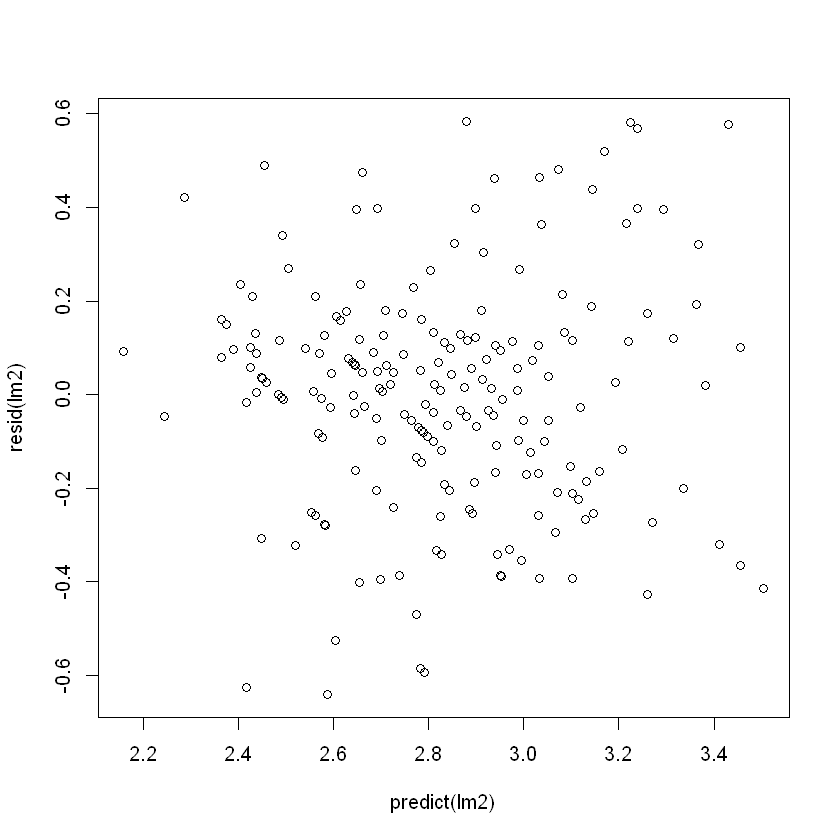

In [50]:
plot(predict(lm2), resid(lm2))

In [51]:
library('Jmisc')

Warning message:
"package 'Jmisc' was built under R version 4.2.3"


In [52]:
resid2 <- resid(lm2)

In [53]:
#not
aux1 <- lm((resid2^2) ~ BR)
summary(aux1)


Call:
lm(formula = (resid2^2) ~ BR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07040 -0.05391 -0.04085  0.01746  0.35401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.043898   0.020142   2.179   0.0305 *
BR          0.006716   0.008129   0.826   0.4097  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08682 on 198 degrees of freedom
Multiple R-squared:  0.003436,	Adjusted R-squared:  -0.001597 
F-statistic: 0.6827 on 1 and 198 DF,  p-value: 0.4097


In [54]:
#not
aux2 <- (lm((resid2^2) ~ BR^2))
summary(aux2)


Call:
lm(formula = (resid2^2) ~ BR^2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07040 -0.05391 -0.04085  0.01746  0.35401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.043898   0.020142   2.179   0.0305 *
BR          0.006716   0.008129   0.826   0.4097  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08682 on 198 degrees of freedom
Multiple R-squared:  0.003436,	Adjusted R-squared:  -0.001597 
F-statistic: 0.6827 on 1 and 198 DF,  p-value: 0.4097


In [55]:
#might be
aux3 <- lm((resid2^2) ~ Area)
summary(aux3)


Call:
lm(formula = (resid2^2) ~ Area)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08342 -0.05134 -0.03773  0.01760  0.35518 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0203004  0.0207761   0.977   0.3297  
Area        0.0004123  0.0002076   1.986   0.0484 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08612 on 198 degrees of freedom
Multiple R-squared:  0.01953,	Adjusted R-squared:  0.01458 
F-statistic: 3.944 on 1 and 198 DF,  p-value: 0.04842


In [56]:
#might be
aux4 <- lm((resid2^2) ~ Area^2)
summary(aux4)


Call:
lm(formula = (resid2^2) ~ Area^2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08342 -0.05134 -0.03773  0.01760  0.35518 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0203004  0.0207761   0.977   0.3297  
Area        0.0004123  0.0002076   1.986   0.0484 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08612 on 198 degrees of freedom
Multiple R-squared:  0.01953,	Adjusted R-squared:  0.01458 
F-statistic: 3.944 on 1 and 198 DF,  p-value: 0.04842


In [57]:
#stronger
aux5 <- lm((resid2^2) ~ DistToCenter)
summary(aux5)


Call:
lm(formula = (resid2^2) ~ DistToCenter)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08766 -0.05150 -0.03276  0.02528  0.35852 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.110722   0.017811   6.217 2.95e-09 ***
DistToCenter -0.006226   0.002048  -3.040  0.00268 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08501 on 198 degrees of freedom
Multiple R-squared:  0.0446,	Adjusted R-squared:  0.03978 
F-statistic: 9.243 on 1 and 198 DF,  p-value: 0.002683


In [58]:
aux6 <- lm((resid2^2) ~ DistToCenter^2)
summary(aux6)


Call:
lm(formula = (resid2^2) ~ DistToCenter^2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08766 -0.05150 -0.03276  0.02528  0.35852 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.110722   0.017811   6.217 2.95e-09 ***
DistToCenter -0.006226   0.002048  -3.040  0.00268 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08501 on 198 degrees of freedom
Multiple R-squared:  0.0446,	Adjusted R-squared:  0.03978 
F-statistic: 9.243 on 1 and 198 DF,  p-value: 0.002683


In [60]:
improve2 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni, weights = 1/sqrt(Area))
summary(improve2)
rmse(log(Price, base = exp(1)), predict(improve2))
mae(log(Price, base = exp(1)), predict(improve2))
mape(log(Price, base = exp(1)), predict(improve2))
resettest(improve2)
bptest(improve2)




Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni, weights = 1/sqrt(Area))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.221157 -0.047738  0.006519  0.039232  0.190790 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.234157   0.081361  27.460  < 2e-16 ***
Area          0.005190   0.001191   4.359 2.11e-05 ***
DistToCenter -0.029563   0.006080  -4.863 2.38e-06 ***
BR            0.092698   0.044474   2.084   0.0384 *  
Furni         0.198353   0.035849   5.533 1.00e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07955 on 195 degrees of freedom
Multiple R-squared:  0.5365,	Adjusted R-squared:  0.527 
F-statistic: 56.42 on 4 and 195 DF,  p-value: < 2.2e-16


[1] 0.2445447

[1] 0.1869112

[1] 0.06701862


	RESET test

data:  improve2
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894



	studentized Breusch-Pagan test

data:  improve2
BP = 6.3161, df = 4, p-value = 0.1768
